In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load Yanwen's contrast calculation tool
from ContrastCalculate import get_wavelength_in_A, calculateContrast

# Load Alex's intensity calculation tool
from Utility import custom_ticks, get_detector_q_map, iq_estimate

ModuleNotFoundError: No module named 'ContrastCalculate'

In [ ]:
####################################################
#  Define parameters to calculate the contrast
####################################################
E = 9.5  # keV

# Define experimental parameters
expParams = dict()
expParams['M'] = 2.  # (um) Beam size on the sample perpendicular to the diffraction plane
expParams['L'] = 2.  # (um) Beam size on the sample within the diffraction plane
expParams['W'] = 50.  # (um) Sample thickness
expParams['k0'] = 2 * np.pi / get_wavelength_in_A(E)
expParams['dlol'] = 0.3 / 9500.  # Energy resolution
expParams['detectordis'] = 2.0  # (m) Detector distance
expParams['pixelsize'] = 50.0  # (um) detector pixel size
expParams['gamma'] = 0.0
expParams['Q'] = np.array([0.04])
expParams['tthetadet'] = np.arcsin(expParams['Q'] / 2. / expParams['k0']) * 2
expParams['comment'] = "LCLS: Fixed incident {:.4}".format((np.pi / 2 - expParams['gamma']) * 180. / np.pi)

# Calculating differential cross-section

$\dfrac{d\sigma}{d\Omega} = \Sigma_i\Sigma_j e^{-i\mathbf{q}\cdot(\mathbf{r_j} - \mathbf{r_i})}|F(\mathbf{q})|^2[\epsilon\cdot\epsilon^\prime]^2$

Assuming the cross terms to be negligible and sample to be static

$e^{-i\mathbf{q}\cdot(\mathbf{r_j} - \mathbf{r_i})} \approx N_{atoms} = \rho \cdot V_{scatter}$

$V_{scatter} = d_{eff}\cdot l_{beam}^2$

$[\epsilon\cdot\epsilon^\prime] = |cos(2\theta)|$

$F(Q) \approx r_0\cdot f(Q)\sqrt{N_{atoms}}$

with $f(Q)$ as the atomic form factor and $r_0$ is the electron radius

In [61]:

# Beam transverse coherence length,
# no need to change these unless you know
# why you need to change them
expParams['xi_h'] = 30.  # (um) Beam coherence length perpendicular to the diffraction plane
expParams['xi_v'] = 30.  # (um) Beam coherence length within to the diffraction plane

###################################################################################
#  Calculate the contrast value for each sample thickness and detector position
###################################################################################
N = 100
contrasts = np.zeros((N, N, 5))
# thickness
Ws = np.logspace(1, 4, N)
# detector distances
detectordis = np.logspace(0, 1, N)
for i, W0 in enumerate(Ws):
    for j, detectordis0 in enumerate(detectordis):
        expParams['W'] = W0
        expParams['detectordis'] = detectordis0
        contrasts[i, j, :] = calculateContrast(expParams)
        
beta_map = contrasts[:,:,-1]

/cds/sw/ds/ana/conda1/inst/envs/ana-4.0.36-py3/lib/python3.7/site-packages/ipykernel/__main__.py:39: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [62]:
beta_map[beta_map<0.01] = 0

In [63]:
#detector distance [m]
xtick_values = np.array([1,2,3,4,5,6,7,8,9,10])
xtick_labels = ['1','2','3','4','5','6','7','8','9','10']

#sample thickness [um]
ytick_values = np.array([1e1,2e1,3e1,4e1,5e1,6e1,7e1,8e1,9e1,
                         1e2,2e2,3e2,4e2,5e2,6e2,7e2,8e2,9e2,
                         1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,
                         1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4])*1e-6
ytick_labels = [r'$10^{1}$','','','','','','','','',
                r'$10^{2}$','','','','','','','','',
                r'$10^{3}$','','','','','','','','',
                r'$10^{4}$','','','','','','','','']

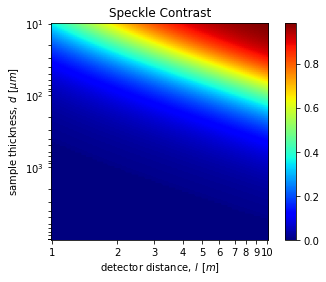

In [69]:
fig, axis = plt.subplots(ncols=1, nrows=1)

im = axis.imshow(beta_map, cmap='jet')

custom_ticks(tick_values=xtick_values,
             tick_labels=xtick_labels,
             value_range=detectordis,
             axis='x',
             axis_handle=axis)

custom_ticks(tick_values=ytick_values,
             tick_labels=ytick_labels,
             value_range=Ws * 1e-6,
             axis='y',
             axis_handle=axis)

axis.set_xlabel('detector distance, '+r'$l \:\: [m]$')
axis.set_ylabel('sample thickness, '+r'$d \:\: [\mu m]$')
axis.set_title('Speckle Contrast')

fig.colorbar(im, ax=axis)
plt.show()

In [65]:
rho_xenon = 8.371   #in mol/l at critical point

N_A = 6.023e23
r_0 = 2.82e-15 # radius of electron in m
## Get the structure factor
a20.2933,3.9282,19.0298,0.344,8.9767,26.4659,1.99,64.2658,3.7118





f_Q_xenon = 53.997 # For Q = 0.04 

polarization_factor = np.cos(expParams['tthetadet'][0])**2 #Polarization correction

attenLength_9keV = 39.8397e-6 #Attenuation length in m at T = 289K
d    = 2.   *1e-3  # sample thickness [m]

# Effective sample thickness
d_eff_9keV = attenLength_9keV*(1 - np.exp(-d/attenLength_9keV))

l_beam = expParams['M'] * 1e-6 #beam thickness in m

N_atoms = rho_xenon*1000*N_A

F_Q_xenon = f_Q_xenon*r_0

diff_cross_9keV = (N_atoms)*(F_Q_xenon**2)

In [66]:
diff_cross_9keV

116.90354611197294

In [67]:
###################################################
# Get photon per pulse for the split delay device
###################################################
incident_pulse_energy = 20.  # uJ
incident_pulse_energy_in_eV = incident_pulse_energy *  6241506479963.2

efficiency_per_branch = 0.008 # Transmission efficiency per branch of the split delay

photon_per_pulse = incident_pulse_energy_in_eV * efficiency_per_branch / (E * 1000)   # photon number per branch per 
print("For each incident pulse, there are {:.2e} photons in each branch".format(photon_per_pulse))

For each incident pulse, there are 1.11e+08 photons in each branch


In [68]:
"""
calculate scattering intensity and speckle contrast
"""
l    = 1.5         # sample-to-detector distance [m]
intensity_map = np.zeros((100,100))

for i,l in enumerate(detectordis):
    for j,d in enumerate(Ws):
        
        intensity_map[j,i] = iq_estimate(detector_distance=l,
                                        sample_thickness=d * 1e-6,
                                        pixel_size= expParams['pixelsize'] / 1e6,
                                        photon_per_pulse=photon_per_pulse,
                                        diff_sigma=diff_cross_9keV * 3,
                                        attenuation_length=attenLength_9keV,
                                       )
        
print('Done')
        

Done


In [71]:
pixel_num_holder = np.zeros(100)  # calculate the number of pixels within the range
Q_in_m = expParams['Q'][0] * 1e10
for i,l in enumerate(detectordis):    
    q_map = get_detector_q_map(theta0 = np.deg2rad(expParams['tthetadet'][0]) / 2.,
                               n_pix = 1500,
                               pix_size = expParams['pixelsize'] / 1e6,
                               det_dist = l,
                               wave_vec_in = expParams['k0'] * 1e10)
    pixel_num_holder[i] = np.count_nonzero(np.where(np.abs(q_map - Q_in_m) <= 0.01 * Q_in_m))

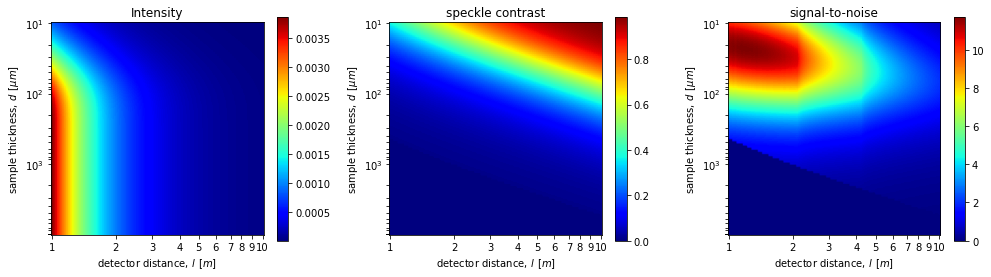

In [74]:
fig,ax = plt.subplots(1,3)
fig.set_figheight(3.8)
fig.set_figwidth(14.)

#detector distance [m]
xtick_values = np.array([1,2,3,4,5,6,7,8,9,10])
xtick_labels = ['1','2','3','4','5','6','7','8','9','10']

#sample thickness [um]
ytick_values = np.array([1e1,2e1,3e1,4e1,5e1,6e1,7e1,8e1,9e1,
                         1e2,2e2,3e2,4e2,5e2,6e2,7e2,8e2,9e2,
                         1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,
                         1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4])*1e-6
ytick_labels = [r'$10^{1}$','','','','','','','','',
                r'$10^{2}$','','','','','','','','',
                r'$10^{3}$','','','','','','','','',
                r'$10^{4}$','','','','','','','','']

im = ax[0].imshow(intensity_map, cmap='jet')

custom_ticks(tick_values=xtick_values,
             tick_labels=xtick_labels,
             value_range=detectordis,
             axis='x',
             axis_handle=ax[0])

custom_ticks(tick_values=ytick_values,
             tick_labels=ytick_labels,
             value_range=Ws * 1e-6,
             axis='y',
             axis_handle=ax[0])

ax[0].set_xlabel('detector distance, '+r'$l \:\: [m]$')
ax[0].set_ylabel('sample thickness, '+r'$d \:\: [\mu m]$')
ax[0].set_title('Intensity')
fig.colorbar(im,ax=ax[0])


#speckle contrast
im = ax[1].imshow(beta_map,cmap='jet')

custom_ticks(tick_values=xtick_values,
             tick_labels=xtick_labels,
             value_range=detectordis,
             axis='x',
             axis_handle=ax[1])

custom_ticks(tick_values=ytick_values,
             tick_labels=ytick_labels,
             value_range=Ws * 1e-6,
             axis='y',
             axis_handle=ax[1])

ax[1].set_xlabel('detector distance, '+r'$l \:\: [m]$')
ax[1].set_ylabel('sample thickness, '+r'$d \:\: [\mu m]$')
ax[1].set_title('speckle contrast')
fig.colorbar(im,ax=ax[1])


#signal-to-noise ratio

#assumptions
N_shots = 1e6     # number of shots per condition

snr_map = intensity_map * beta_map * np.sqrt(N_shots) * np.sqrt(pixel_num_holder[np.newaxis, :])/(2*(1+beta_map))
im = ax[2].imshow(snr_map,cmap='jet')

custom_ticks(tick_values=xtick_values,
             tick_labels=xtick_labels,
             value_range=detectordis,
             axis='x',
             axis_handle=ax[2])

custom_ticks(tick_values=ytick_values,
             tick_labels=ytick_labels,
             value_range=Ws * 1e-6,
             axis='y',
             axis_handle=ax[2])

ax[2].set_xlabel('detector distance, '+r'$l \:\: [m]$')
ax[2].set_ylabel('sample thickness, '+r'$d \:\: [\mu m]$')
ax[2].set_title('signal-to-noise')
fig.colorbar(im,ax=ax[2])


plt.tight_layout()
plt.savefig('Xe_maps.png',format='png')
plt.show()


In [58]:
rho_Ar = 8.3 

E = 15.0  # keV
expParams['Q'] = np.array([1.0])
expParams['k0'] = 2 * np.pi / get_wavelength_in_A(E)
expParams['tthetadet'] = np.rad2deg(np.arcsin(expParams['Q'] / 2. / expParams['k0'])) * 2

polarization_factor = np.cos(expParams['tthetadet'][0])**2 #Polarization correction
f_Q_Ar = 16.877

attenLength_15keV = 1688e-6 
d_eff_15keV = attenLength_15keV*(1 - np.exp(-d/attenLength_15keV))

N_atoms = rho_Ar*1000*N_A

F_Q_Ar = f_Q_Ar*r_0

diff_cross_15keV = (N_atoms)*(F_Q_Ar**2)*(polarization_factor)
diff_cross_15keV

1.063372886963623

In [59]:
expParams['tthetadet']

array([7.54252523])